In [1]:
import numpy as np
import pandas as pd
import calendar

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
df = pd.read_csv("unemployment_11_20.xls")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [4]:
df.isnull().sum()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [5]:
# Renaming the columns
df.columns = ['States', 'Dates', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting the 'Date' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], dayfirst=True)

# Converting 'Frequency' and 'Region' to categorical values
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

# Extracting the month value from the 'Date' column and creating a new column
df['Month_int'] = df['Dates'].dt.month

# Mapping the integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column 
# df.drop(columns='Month', inplace=True)

# Display the updated DataFrame
df.head()

,States,Dates,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


# EDA

- basic-stats

In [6]:
df_stat = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
print(round(df_stat.describe().T, 2))

                                     count         mean          std  \
Estimated Unemployment Rate          267.0        12.24        10.80   
Estimated Employed                   267.0  13962105.72  13366318.36   
Estimated Labour Participation Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated Unemployment Rate               0.50        4.84        9.65   
Estimated Employed                   117542.00  2838930.50  9732417.00   
Estimated Labour Participation Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated Unemployment Rate                16.76        75.85  
Estimated Employed                   21878686.00  59433759.00  
Estimated Labour Participation Rate        44.06        69.69  


In [7]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()
print(round(region_stats, 3))

      Region  Estimated Unemployment Rate  Estimated Employed  \
0       East                       13.916        1.960237e+07   
1      North                       15.890        1.307249e+07   
2  Northeast                       10.950        3.617106e+06   
3      South                       10.455        1.404059e+07   
4       West                        8.239        1.862351e+07   

   Estimated Labour Participation Rate  
0                               40.109  
1                               38.703  
2                               52.055  
3                               40.436  
4                               41.257  


## headmap

<Axes: >

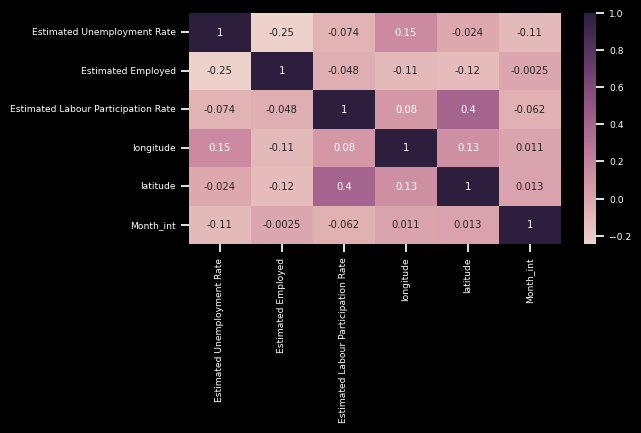

In [8]:
heatMap = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
heatMap = heatMap.corr()
plt.figure(figsize=(6,3))
sns.set_context('notebook', font_scale=0.6)
sns.heatmap(data=heatMap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [9]:
import plotly.express as px

# Your existing code
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate per States', template='seaborn')

# Update the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Set the figure size
fig.update_layout(height=450, width=650)  

fig.show()


# Scatter matrix cosidering the employed and unemployed rates

In [10]:
fig= px.scatter_matrix(df, template='seaborn', dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'], color = 'Region')

# Set the figure size
fig.update_layout(width=700, height=500)

fig.show()

# Bar plot showing the averate unemployement rate in each state

In [11]:
plot_unemp = df[['Estimated Unemployment Rate', 'States']]
df_unemployed = plot_unemp.groupby('States').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemployed, 
             x='States', 
             y='Estimated Unemployment Rate', 
             color = 'States', 
             title = 'Average unemployment rate in eaxh state', 
             template = 'seaborn')

# Set the figure size
fig.update_layout(width=1000, height=600)
fig.show()

# top unemployment-rate states

In [12]:
top_5_unemployed = df_unemployed.tail(5)

# Create a bar plot
fig = px.bar(
    top_5_unemployed,
    x='States',
    y='Estimated Unemployment Rate',
    color='States',
    title='Top 5 States with the Highest Average Unemployment Rate',
    template='seaborn'
)

fig.show()

# SUNBURST chart for each Region and States

In [13]:
unemployed_df = df[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]

fig = px.bar(
    unemployed_df,
    x='States',
    y='Estimated Unemployment Rate',
    color='Region',
    title='Unemployment rate in each Region and States:',
    height=300,
    color_continuous_scale='rdylbu',
    template='presentation'
)

fig.show()

In [14]:
unemployed = unemployed_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()

#create a Sunburst chart 
fig = px.sunburst(unemployed,
                  path=['Region', 'States'],
                  values='Estimated Unemployment Rate',
                  color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Region and State',
                  height=550,
                  template='presentation')

fig.show()

In [15]:
fig = px.scatter_geo(df, 'longitude', 'latitude',
                     color='Region', 
                     hover_name='States',
                     size='Estimated Unemployment Rate',
                     animation_frame='Month_name',
                     scope='asia',
                     template='seaborn',
                     title='Impact of LOCKDOWN on employment:')

# Adjust animation duration
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 3000

# Update geographical axis ranges and ocean color
fig.update_geos(
    lataxis_range=[5, 35],
    lonaxis_range=[65, 100],
    oceancolor='#89B4FA', 
    showocean=True 
)
#figure-layout
fig.update_layout(
    height=800,
    width=700
)

fig.show()